## IS597MLC: Traffic Flow Prediction using the Kaggle's Traffic Prediction Dataset

### Student Name: Iishi Patel  
### Net ID: iiship2

## Data set 

Traffic congestion is rising in cities around the world. Contributing factors include expanding urban populations, aging infrastructure, inefficient and uncoordinated traffic signal timing and a lack of real-time data.

The impacts are significant. Traffic data and analytics company INRIX estimates that traffic congestion cost U.S. commuters $305 billion in 2017 due to wasted fuel, lost time and the increased cost of transporting goods through congested areas. Given the physical and financial limitations around building additional roads, cities must use new strategies and technologies to improve traffic conditions.

Source: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset


## Loading the dataset

In [1]:
 from modules import *

In [2]:
file_path = 'traffic.csv'
traffic_data =load_data(file_path)

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Missing Values:  DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
Statistics:                              DateTime      Junction      Vehicles            ID
count                          48120  48120.000000  48120.000000  4.812000e+04
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334  2.016330e+10
min              2015-11-01 00:00:00      1.000000      1.000000  2.015110e+10
25%              2016-04-16 01:45:00      1.000000      9.000000  2.016042e+10
50%              2016-09-30 03:30:00      2.000000     15.000000  2.016093e+10
75%              2017-02-25 16:00:00      3.000000     29.000000  2.017023e+10
max         

## Detecting and Handling 95th Percentile Outliers

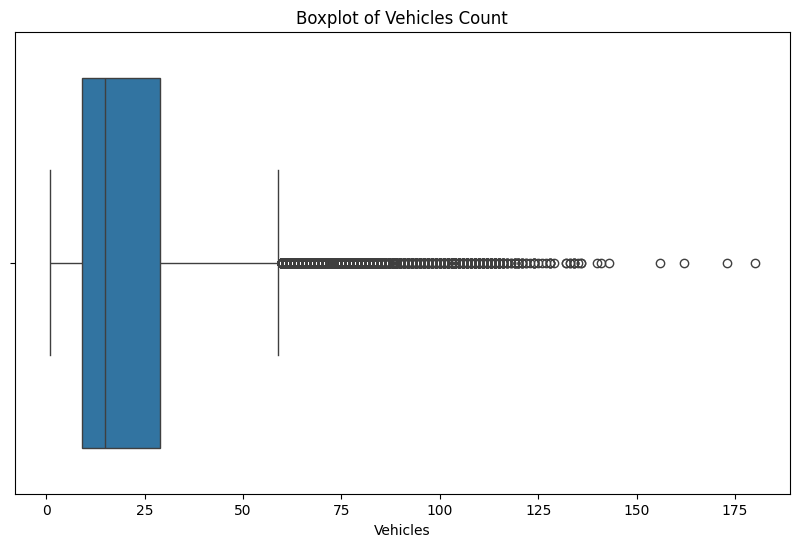

95th Percentile for Vehicles: 70.0


In [3]:
traffic_data = detect_outliers(traffic_data)

## Preprocessed Data

In [4]:
traffic_data = preprocess_data(traffic_data)

             DateTime  Vehicles           ID  Vehicles_normalized  Hour   
0 2015-11-01 00:00:00        15  20151101001             0.202899     0  \
1 2015-11-01 01:00:00        13  20151101011             0.173913     1   
2 2015-11-01 02:00:00        10  20151101021             0.130435     2   
3 2015-11-01 03:00:00         7  20151101031             0.086957     3   
4 2015-11-01 04:00:00         9  20151101041             0.115942     4   

   DayOfWeek  Month  Junction_1  Junction_2  Junction_3  Junction_4  
0          6     11        True       False       False       False  
1          6     11        True       False       False       False  
2          6     11        True       False       False       False  
3          6     11        True       False       False       False  
4          6     11        True       False       False       False  


# ARIMA
ARIMA is effective for many time-series datasets and can help us understand the basic patterns in traffic data before we consider more complex models.

Here's the plan for ARIMA modeling:

- Prepare the data specifically for time-series analysis for Junction 1
- Determine the parameters for the ARIMA model (p, d, q).
- Train the ARIMA model on the training data.
- Validate the model on the testing data.

### Arima Specific Preprocessing

In [5]:
arima_data = arima_specific_preprocessing(traffic_data)

### Parameter Selection

ADF Statistic Value: -6.60274438347299
P - Value: 6.672375910856175e-09
Critical Values:  {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}


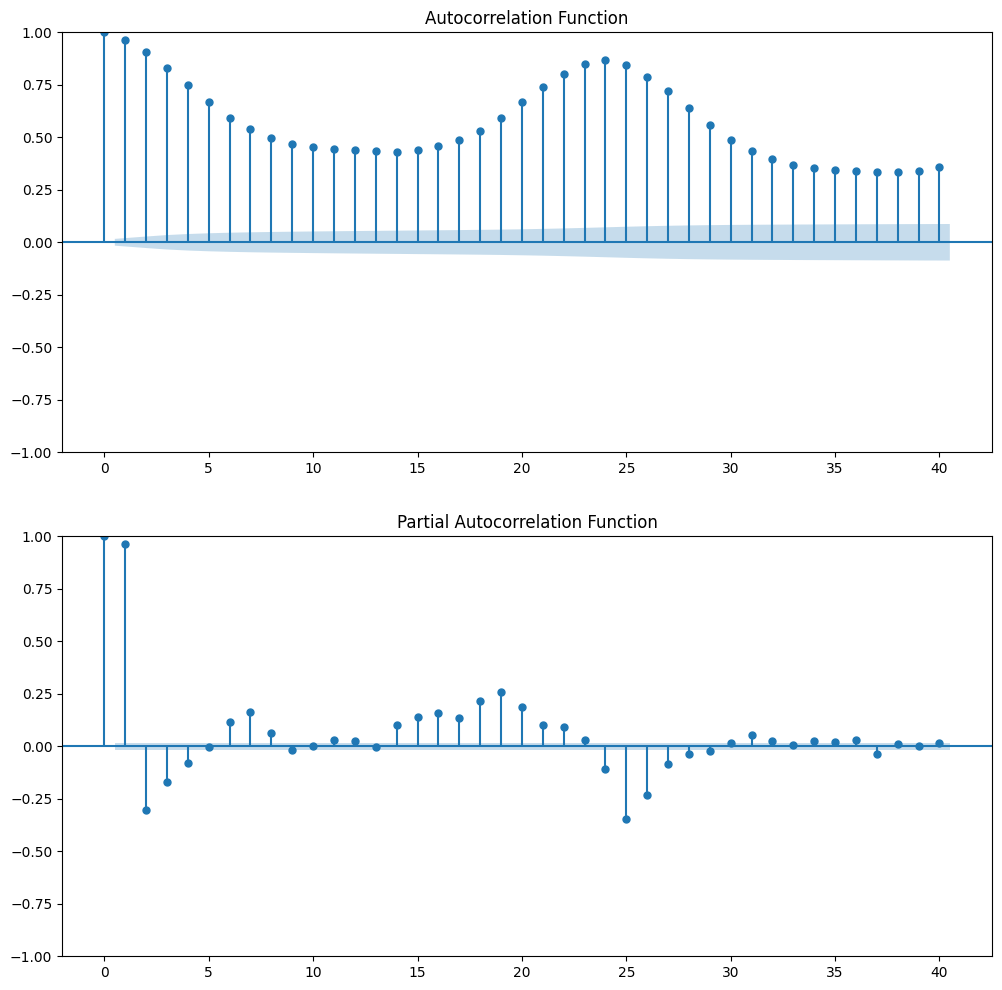

In [6]:
arima_parameter_selection(arima_data)

The results from the Dickey-Fuller test are as follows:

- ADF Statistic: −6.60, which is less than the critical values at all common significance levels (1%, 5%, and 10%).
- p-value: Approximately 6.67*10**-9, indicating strong evidence against the null hypothesis of non-stationarity.

These results suggest that the time series of vehicles at Junction 1 is stationary and thus suitable for ARIMA modeling without needing differencing (**d=0**)

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide insights for choosing the ARIMA parameters:
- The PACF plot shows a sharp cut-off after the first lag, suggesting that **p=1** could be a good choice for the ARIMA model.
- The ACF plot tails off, which is typical for an AR(1) process, and also suggests that **q could be set to 1** or perhaps a bit higher, depending on additional diagnostics.

### Train ARIMA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


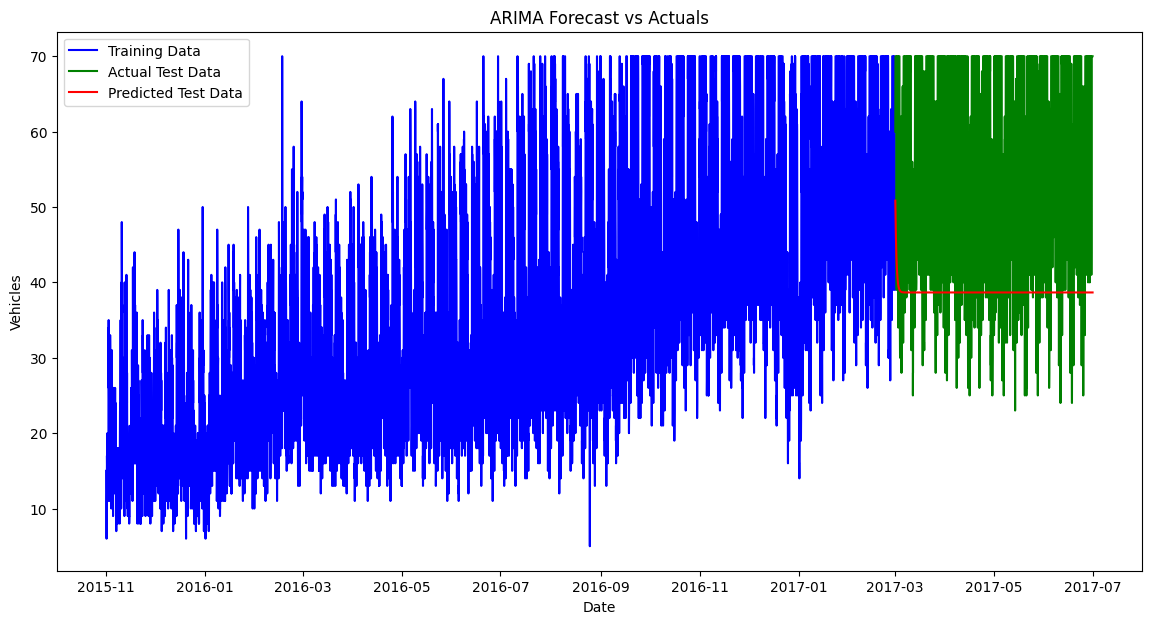

In [7]:
train, test = split_data_arima(arima_data)
p = 1
d = 0
q = 1
forecast_mean = arima_modelling(train, test, p, d, q)

### Evaluate ARIMA model

In [8]:
evaluate_arima(test, forecast_mean)

Mean Absolute Error: 20.65684804539916
Mean Squared Error: 553.1414713338331
Root Mean Squared Error: 23.51895982678301


# Long Short-Term Memory (LSTM) model

Here's the plan for the LSTM model:

- Data Preparation: Since LSTM models require data to be in sequences, we'll format the data accordingly.
- Model Construction: We'll build an LSTM network using TensorFlow.
- Training: The model will be trained on the same training set used for the ARIMA model.
- Prediction and Evaluation: We'll predict the traffic volumes on the test set and compare the results with the ARIMA model.

### Data Preparation

In [9]:
# lstm specific preprocessing
lstm_data, X, y, scaler = lstm_specific_preprocessing(traffic_data)

/Users/iishipatel/Documents/IS597MLC/Final Project/modules.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
/Users/iishipatel/Documents/IS597MLC/Final Project/modules.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data.sort_values('DateTime', inplace=True)


### Model Construction and Training

In [10]:
X_train, X_test, y_train, y_test = split_data_lstm(X,y)

model, history = lstm_modelling(X_train, y_train)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1082 - val_loss: 0.0175
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - val_loss: 0.0083
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - val_loss: 0.0043


### Evaluation

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


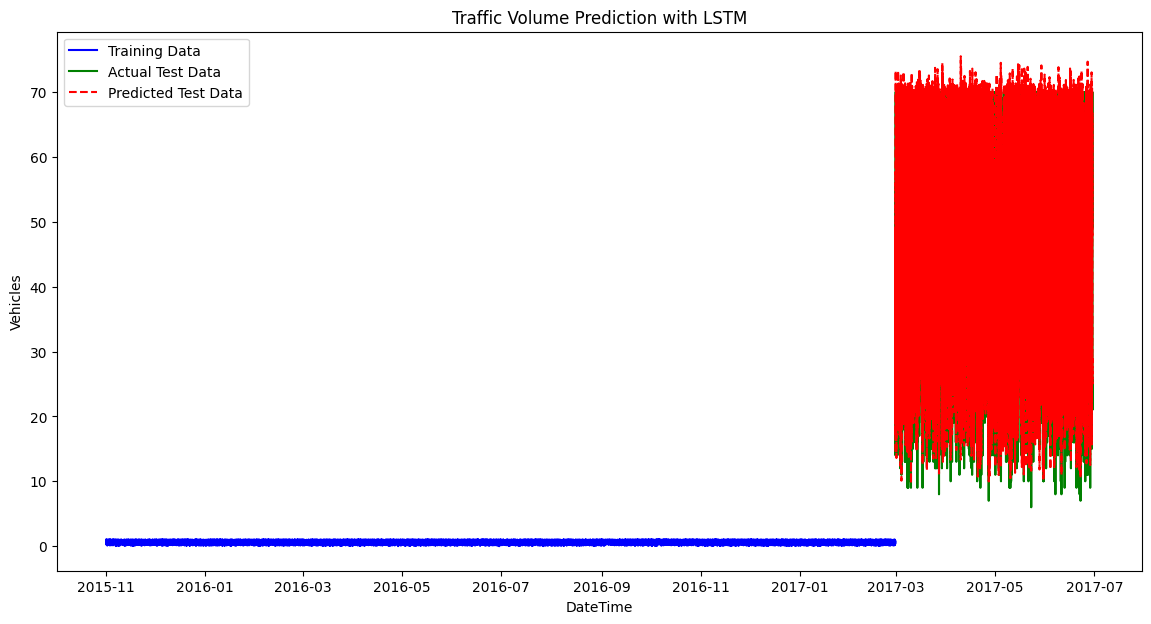

MAE: 3.2376645555542036, MSE: 18.029692261998473, RMSE: 4.246138511871519


In [11]:
evaluate_lstm(model, lstm_data, X_test, y_train, y_test, scaler)